In [10]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.nasnet import NASNetMobile
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
#from keras.optimizers import Adam
from keras import optimizers

In [11]:
base_model=NASNetMobile(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

19996672/19993432 [==============================] - 1s 0us/step


In [12]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [20]:
for layer in model.layers:
    layer.trainable = True
    
#for layer in model.layers[:10]:
#    layer.trainable=False
#for layer in model.layers[10:]:
#    layer.trainable=True

In [21]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('./merged_full_split_final/train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator = test_datagen.flow_from_directory(
    directory='./merged_full_split_final/val/',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3299 images belonging to 6 classes.
Found 822 images belonging to 6 classes.


In [22]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=15,
                   validation_data=test_generator,
                   validation_steps=step_size_test)

Epoch 1/15
103/103 [==============================] - 134s 1s/step - loss: 0.2384 - acc: 0.9405 - val_loss: 4.9804 - val_acc: 0.4113
Epoch 2/15
103/103 [==============================] - 51s 496ms/step - loss: 0.1751 - acc: 0.9472 - val_loss: 5.4510 - val_acc: 0.5177
Epoch 3/15
103/103 [==============================] - 51s 498ms/step - loss: 0.1955 - acc: 0.9479 - val_loss: 6.1682 - val_acc: 0.5038
Epoch 4/15
103/103 [==============================] - 51s 495ms/step - loss: 0.2355 - acc: 0.9346 - val_loss: 4.5559 - val_acc: 0.4823
Epoch 5/15
103/103 [==============================] - 51s 496ms/step - loss: 0.2556 - acc: 0.9283 - val_loss: 10.0553 - val_acc: 0.3089
Epoch 6/15
103/103 [==============================] - 51s 498ms/step - loss: 0.2157 - acc: 0.9388 - val_loss: 12.3640 - val_acc: 0.2329
Epoch 7/15
103/103 [==============================] - 51s 491ms/step - loss: 0.2025 - acc: 0.9428 - val_loss: 11.6270 - val_acc: 0.2684
Epoch 8/15
103/103 [==============================] - 

In [23]:
print(history.history.keys())
plt.figure(1)  

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

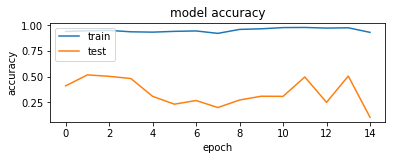

In [24]:
 # summarize history for accuracy
    
 plt.subplot(211)  
 plt.plot(history.history['acc'])  
 plt.plot(history.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.savefig('./graphs/model_accuracy.png')

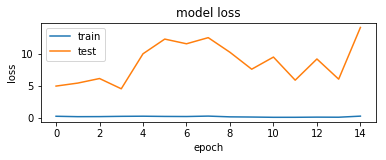

<Figure size 432x288 with 0 Axes>

In [25]:
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.show() 
 plt.savefig('./graphs/model_loss.png')